# Exploratory Analysis & Baseline Model

In [23]:
# Import Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\user\Nairobi_House_Price_Sprint\data\clean_listings.csv")

print(df.shape)
df.head()

(155, 13)


,Location,Property Type,Bedrooms,Bathrooms,Size (sqm),Amenities,Price (KES),Listing Date,size_sqft,price_per_sqft,amenity_score,month,year
0,runda,House,5.0,5.0,518.000000,"Alarm, BBQ, Backup Generator, Balcony, Borehol...",155040000,2025-10-21,5575.700200,27806.373090,21,10,2025
1,lavington,House,4.0,4.0,284.941176,"Aircon, Alarm, BBQ, Balcony, Borehole, Bus Sto...",75000000,2026-02-17,3067.078329,24453.239189,23,2,2026
2,lavington,House,5.0,5.0,284.941176,"Alarm, BBQ, Backup Generator, Balcony, Borehol...",100000000,2026-02-16,3067.078329,32604.318918,24,2,2026
3,karen,House,5.0,7.0,194.000000,"Balcony, Bus Stop, Fibre Internet, Gated Commu...",130000000,2026-02-14,2088.196600,62254.674680,11,2,2026
4,lavington,House,5.0,6.0,284.941176,"Aircon, Alarm, BBQ, Backup Generator, Balcony,...",75000000,2026-02-13,3067.078329,24453.239189,24,2,2026


## EDA QUESTIONS

In [24]:
# Which locations are most expensive?
location_prices = (
    df.groupby("Location")["Price (KES)"]
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

location_prices["Rank"] = location_prices["Price (KES)"] \
    .rank(ascending=False, method="dense")

location_prices = location_prices.sort_values("Rank")

location_prices["Average Price (KES)"] = location_prices["Price (KES)"] \
    .apply(lambda x: f"KES {x:,.0f}")

location_prices = location_prices[["Rank", "Location", "Average Price (KES)"]]

location_prices

,Rank,Location,Average Price (KES)
0,1.0,rosslyn,"KES 130,000,000"
1,2.0,nyari,"KES 120,000,000"
2,3.0,runda,"KES 116,671,111"
3,4.0,karen,"KES 113,857,143"
4,5.0,lower kabete,"KES 102,500,000"
5,6.0,loresho,"KES 101,142,857"
6,7.0,kitisuru,"KES 60,500,000"
7,8.0,brookside,"KES 60,000,000"
8,9.0,lavington,"KES 56,504,444"
9,10.0,langata,"KES 37,350,000"


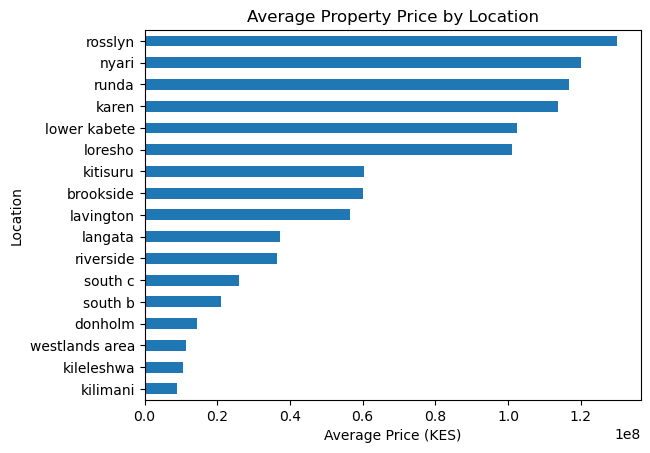

In [25]:
# Visualization
plt.figure()
df.groupby("Location")["Price (KES)"] \
  .mean() \
  .sort_values() \
  .plot(kind="barh")

plt.xlabel("Average Price (KES)")
plt.title("Average Property Price by Location")
plt.show()

In [27]:
# How Strongly does size affect price
correlation = df["Price (KES)"].corr(df["size_sqft"])
print("Correlation between size and price:", correlation)

Correlation between size and price: 0.5786887486380141


Interpretation:

> 0.8+ → strong

> 0.5–0.8 → moderate

> <0.5 → weak

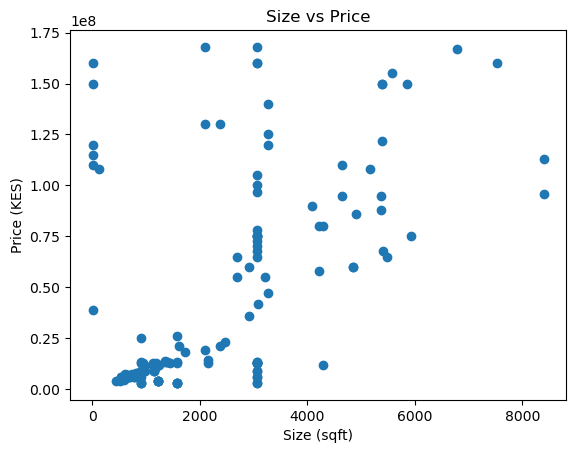

In [28]:
# Visualization
plt.scatter(df["size_sqft"], df["Price (KES)"])
plt.xlabel("Size (sqft)")
plt.ylabel("Price (KES)")
plt.title("Size vs Price")
plt.show()

In [29]:
# Which Amenities Increase Value
# First Use amenity Score
amenity_analysis = (
    df.groupby("amenity_score")["Price (KES)"]
      .mean()
      .reset_index()
      .sort_values("amenity_score")
)

amenity_analysis["Average Price (KES)"] = amenity_analysis["Price (KES)"] \
    .apply(lambda x: f"KES {x:,.0f}")

amenity_analysis = amenity_analysis.drop(columns=["Price (KES)"])

amenity_analysis

,amenity_score,Average Price (KES)
0,0,"KES 65,000,000"
1,1,"KES 62,500,000"
2,2,"KES 80,000,000"
3,4,"KES 30,950,000"
4,5,"KES 88,000,000"
5,10,"KES 47,000,000"
6,11,"KES 96,666,667"
7,12,"KES 85,500,000"
8,13,"KES 38,500,000"
9,15,"KES 110,000,000"


In [30]:
# Then Check Correlation
df["Price (KES)"].corr(df["amenity_score"])

-0.4830500235297974

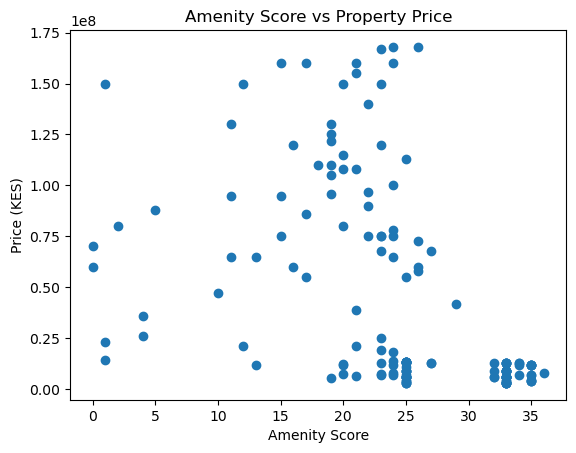

In [31]:
# Visualize
plt.figure()
plt.scatter(df["amenity_score"], df["Price (KES)"])
plt.xlabel("Amenity Score")
plt.ylabel("Price (KES)")
plt.title("Amenity Score vs Property Price")
plt.show()

The amenity score shows a moderate negative correlation (-0.48) with property price. This indicates that the number of listed amenities does not increase price directly. Premium properties appear to derive value primarily from location and size rather than amenity count.

# PART B BASELINE MODEL

In [32]:
# Selecting Features
features = ["Bedrooms", "Bathrooms", "size_sqft", "amenity_score"]

X = df[features]
y = df["Price (KES)"]

In [33]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 25303146.30209077
RMSE: 35505881.14447432
R2: 0.4193669696158644


# Interpretation
- The Mean Absolute Error (MAE) indicates that on average, the model’s price predictions are off by approximately KES 25.3 million.

- The Root Mean Squared Error (RMSE) of KES 35.5 million suggests the presence of larger prediction errors, meaning high-value properties are likely contributing to substantial deviations.

- The model achieved an R² score of 0.42, meaning that approximately 42% of the variance in property prices is explained by the selected features, indicating moderate explanatory power and room for improvement.